In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import mplcyberpunk
plt.style.use('cyberpunk')

In [2]:
dataset = pd.read_csv('AlgierianExportData.csv', header=None)
dataset.head()

,0
0,39.043173
1,46.244557
2,19.793873
3,24.684682
4,25.084059


In [3]:
dataset = dataset[0].values
x_trace = np.arange(len(dataset))

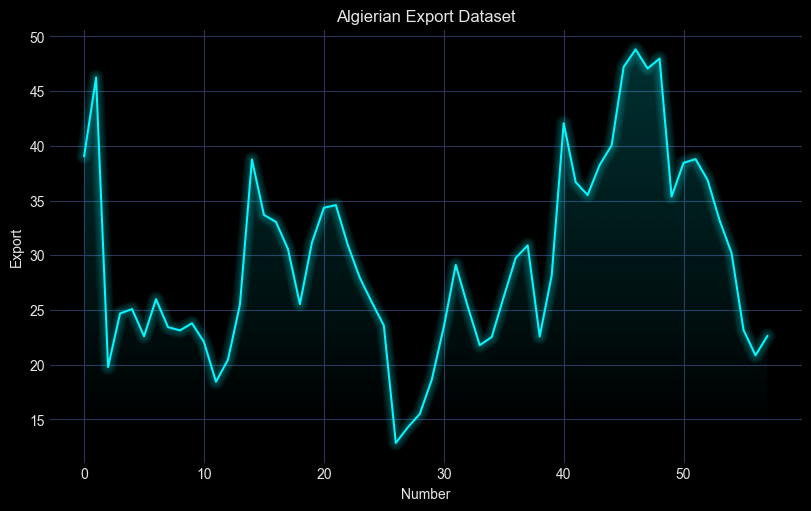

In [4]:
fig, ax = plt.subplots(1, 1, layout='constrained', figsize=(8, 5))
ax.set_facecolor('black')
fig.set_facecolor('black')
ax.plot(x_trace, dataset)
ax.set(xlabel='Number', ylabel='Export', 
       title='Algierian Export Dataset')
mplcyberpunk.make_lines_glow(ax=ax)
mplcyberpunk.add_gradient_fill(ax=ax, alpha_gradientglow=0.2)

In [5]:
split_ratio = 0.8
split_part = int(len(dataset) * split_ratio)
data_train = dataset[:split_part+1]
data_test = dataset[split_part:]
x_train = x_trace[:split_part+1]
x_test = x_trace[split_part:]
data_test

array([48.81068822, 47.06816355, 47.97334514, 35.37165064, 38.44454785,
       38.78695388, 36.89054757, 33.20989779, 30.21911743, 23.17177829,
       20.86001063, 22.63888685])

In [6]:
def exponential_smoothing(data, alpha):
    predictions = np.array([])
    for index, t in enumerate(data):
        if index == 0:
            predictions = np.zeros(len(data))
            predictions[index] = data[index]
        else:
            predictions[index] = alpha*data[index] + (1 - alpha)*predictions[index - 1]
    return predictions


def SSE(array_1, array_2):
    return np.power(array_1 - array_2, 2).sum()

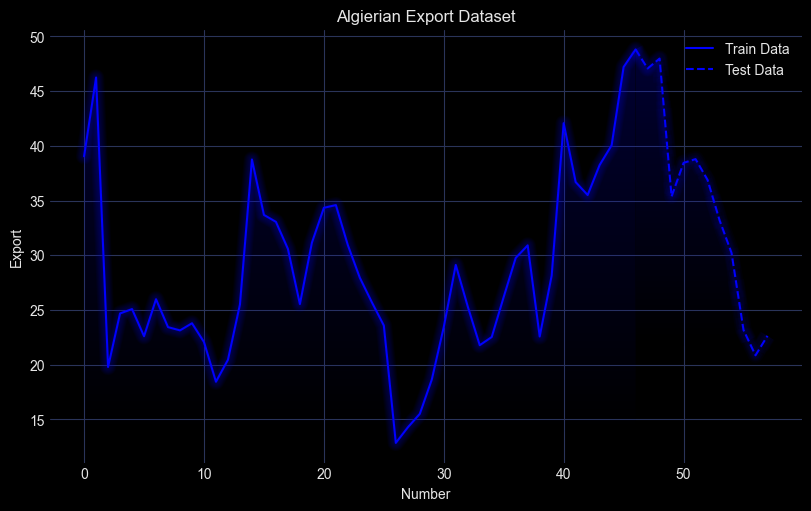

In [7]:
fig2, ax2 = plt.subplots(1, 1, layout='constrained', figsize=(8, 5))
ax2.plot(x_train, data_train, color='blue', label='Train Data')
ax2.plot(x_test, data_test, color='blue', label='Test Data', linestyle='--')
ax2.set(xlabel='Number', ylabel='Export', title='Algierian Export Dataset')
ax2.legend()
ax2.set_facecolor('black')
fig2.set_facecolor('black')
mplcyberpunk.make_lines_glow(ax=ax2)
mplcyberpunk.add_gradient_fill(ax=ax2, alpha_gradientglow=0.2)

In [8]:
colors = ['red', 'cyan', 'lime', 'violet', 'blue', 'orange']
alphas = [0, 0.02, 0.08, 0.15, 0.3, 0.6]

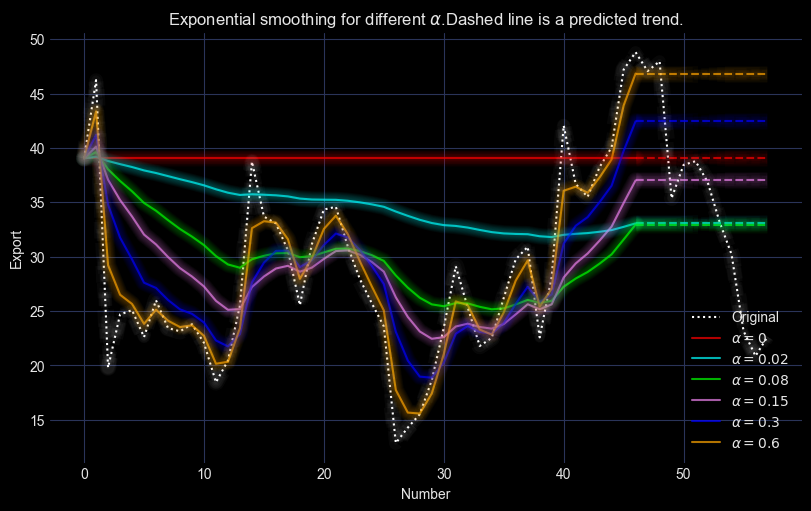

In [9]:
fig3, ax3 = plt.subplots(1, 1, layout='constrained', figsize=(8, 5))
ax3.plot(x_trace, dataset, color='white', label='Original', linestyle=':')
for alpha, color in zip(alphas, colors):
    smoothed = exponential_smoothing(data_train, alpha)
    prediction = np.full(len(x_test), smoothed[-1])
    ax3.plot(x_train, smoothed, label=f'$\\alpha = {alpha}$', color=color, alpha=0.7)
    ax3.plot(x_test, prediction, color=color, linestyle='--', alpha=0.7)
ax3.set(xlabel='Number', ylabel='Export', title='Exponential smoothing for different $\\alpha$.'
                                                'Dashed line is a predicted trend.')
ax3.legend()
ax3.set_facecolor('black')
fig3.set_facecolor('black')
mplcyberpunk.make_lines_glow(ax=ax3)

In [10]:
alpha_range = np.arange(0, 1.01, 0.01)
sse_range = np.zeros(len(alpha_range))
for index, alpha in enumerate(alpha_range):
    smoothed = exponential_smoothing(data_train, alpha)
    prediction = np.full(len(x_test), smoothed[-1])
    sse_range[index] = SSE(dataset, np.concatenate((smoothed[:-1], prediction)))
    # sse_range[index] = SSE(data_test, prediction)

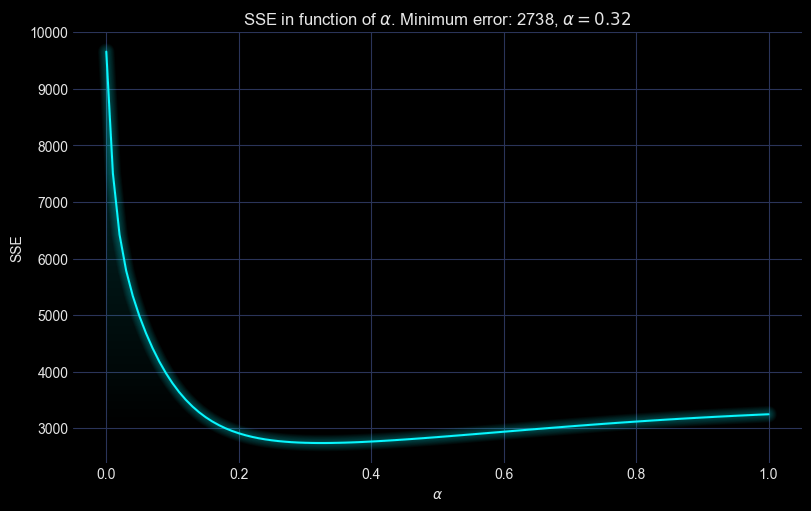

In [11]:
fig4, ax4 = plt.subplots(1, 1, layout='constrained', figsize=(8, 5))
ax4.plot(alpha_range, sse_range)
ax4.set(title=f'SSE in function of $\\alpha$. '
              f'Minimum error: {sse_range.min():.0f}, '
              f'$\\alpha = {alpha_range[sse_range.argmin()]}$',
        xlabel='$\\alpha$', ylabel='SSE')
ax4.set_facecolor('black')
fig4.set_facecolor('black')
mplcyberpunk.make_lines_glow(ax=ax4)
mplcyberpunk.add_gradient_fill(ax=ax4, alpha_gradientglow=0.2)